# Stability API - Basic Inference

**In this notebook we're going to go over how to set up the Stability SDK package, and how to use our API to perform a basic inference call.**

In [1]:
#@title <a name="Step 1"><font color="#FFFFFF">1. Install the Stability SDK package.</font></a>

%pip install stability-sdk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 2.0 MB/s 
     |████████████████████████████████| 1.1 MB 65.2 MB/s 
     |████████████████████████████████| 2.4 MB 61.0 MB/s 
     |████████████████████████████████| 4.6 MB 66.5 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.51.1
    Uninstalling grpcio-1.51.1:
      Successfully uninstalled grpcio-1.51.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.48.2 requires grpcio>=1.48.2, but you have grpcio 1.48.1 which is incompatible.


In [6]:
#@title <a name="Step 2"><font color="#FFFFFF">2. Set up our environment variables and API Key.</font></a>

import getpass, os

# Our Host URL should not be prepended with "https" nor should it have a trailing slash.
os.environ['STABILITY_HOST'] = 'grpc.stability.ai:443'

# Sign up for an account at the following link to get an API Key. https://beta.dreamstudio.ai/membership
# Click on the following link once you have created an account to be taken to your API Key. Paste it below when prompted after running the cell. https://beta.dreamstudio.ai/membership?tab=apiKeys
os.environ['STABILITY_KEY'] = getpass.getpass('sk-qTA2JO7A6JAZLoMQCcbGGukASGe')

sk-qTA2JO7A6JAZLoMQCcbGGukASGe8TUwLJzZJ5z69O77kg9iK··········


In [7]:
#@title <a name="Step 3"><font color="#FFFFFF">3. Import additional dependencies and establish our connection to the API.</font></a>

import io
import os
import warnings

from IPython.display import display
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation

# Set up our connection to the API.
stability_api = client.StabilityInference(
    key=os.environ['STABILITY_KEY'], # API Key reference.
    verbose=True, # Print debug messages.
    engine="stable-diffusion-v1-5", # Set the engine to use for generation. 
    # Available engines: stable-diffusion-v1 stable-diffusion-v1-5 stable-diffusion-512-v2-0 stable-diffusion-768-v2-0 stable-inpainting-v1-0 stable-inpainting-512-v2-0
)

INFO:stability_sdk.client:Opening channel to grpc.stability.ai:443
INFO:stability_sdk.client:Channel opened to grpc.stability.ai:443


INFO:stability_sdk.client:Sending request.
INFO:stability_sdk.client:Got keepalive 2a85ec88-da03-4915-a3b4-72b3829ba13e in 0.98s
INFO:stability_sdk.client:Got keepalive 2a85ec88-da03-4915-a3b4-72b3829ba13e in 2.12s
INFO:stability_sdk.client:Got 2a85ec88-da03-4915-a3b4-72b3829ba13e with ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.17s


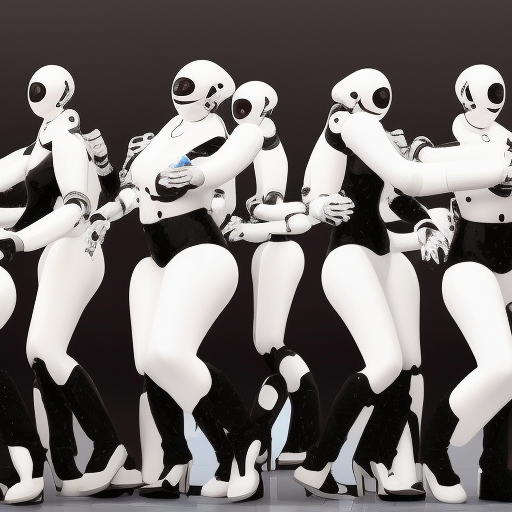

In [16]:
#@title <a name="Step 4"><font color="#FFFFFF">4. Set up initial generation parameters, display image on generation, and safety warning for if the adult content classifier is tripped.</font></a>

# Set up our initial generation parameters.
answers = stability_api.generate(
    prompt="robots team dancing",
    seed=992446758, # If a seed is provided, the resulting generated image will be deterministic.
                    # What this means is that as long as all generation parameters remain the same, you can always recall the same image simply by generating it again.
                    # Note: This isn't quite the case for Clip Guided generations, which we'll tackle in a future example notebook.
    steps=30, # Amount of inference steps performed on image generation. Defaults to 30. 
    cfg_scale=8.0, # Influences how strongly your generation is guided to match your prompt.
                   # Setting this value higher increases the strength in which it tries to match your prompt.
                   # Defaults to 7.0 if not specified.
    width=512, # Generation width, defaults to 512 if not included.
    height=512, # Generation height, defaults to 512 if not included.
    samples=1, # Number of images to generate, defaults to 1 if not included.
    sampler=generation.SAMPLER_K_DPMPP_2M # Choose which sampler we want to denoise our generation with.
                                                 # Defaults to k_dpmpp_2m if not specified. Clip Guidance only supports ancestral samplers.
                                                 # (Available Samplers: ddim, plms, k_euler, k_euler_ancestral, k_heun, k_dpm_2, k_dpm_2_ancestral, k_dpmpp_2s_ancestral, k_lms, k_dpmpp_2m)
)

# Set up our warning to print to the console if the adult content classifier is tripped.
# If adult content classifier is not tripped, save generated images.
for resp in answers:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn(
                "Your request activated the API's safety filters and could not be processed."
                "Please modify the prompt and try again.")
        if artifact.type == generation.ARTIFACT_IMAGE:
            img = Image.open(io.BytesIO(artifact.binary))
            display(img)